In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, confusion_matrix, auc

In [198]:
data = pd.read_csv(r"C:\Users\PAVILION\Desktop\audit_risk.csv")
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1.0
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0.0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0.0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1.0
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0.0


In [199]:
X = data.drop('Risk', axis=1)
y = data.Risk

In [200]:
X.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           1
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            2
History           0
Prob              1
Risk_F            0
Score             0
Inherent_Risk     1
CONTROL_RISK      0
Detection_Risk    1
Audit_Risk        0
dtype: int64

In [201]:
X.Score_B[X.Score_B.isnull()] = X.Score_B.median()
X.Money_Value[X.Money_Value.isnull()] = X.Money_Value.median()
X.RiSk_E[X.RiSk_E.isnull()] = X.RiSk_E.median()
X.Prob[X.Prob.isnull()] = X.Prob.median()
X.Inherent_Risk[X.Inherent_Risk.isnull()] = X.Inherent_Risk.median()
X.Detection_Risk[X.Detection_Risk.isnull()] = X.Detection_Risk.median()

C:\Users\PAVILION\AppData\Local\Temp\ipykernel_15240\2759489330.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X.Score_B[X.Score_B.isnull()] = X.Score_B.median()
C:\Users\PAVILION\AppData\Local\Temp\ipykernel_15240\2759489330.py:1: Sett

In [202]:
X.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [203]:
y[y.isnull()]

214   NaN
Name: Risk, dtype: float64

In [204]:
y = y.drop(214)

In [205]:
X = X.drop(214)

In [206]:
strange_id = []
for i, el in enumerate(X.LOCATION_ID):
    try:
        int(el)
    except:
        print(i)
        print(el)
        strange_id.append(i+1)

350
LOHARU
354
NUH
366
SAFIDON


In [207]:
X = X.drop(strange_id)
y = y.drop(strange_id)

In [208]:
X.LOCATION_ID = np.int_(X.LOCATION_ID)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [210]:
clf = RandomForestClassifier(random_state=0)

In [211]:
clf_params = {'n_estimators': range(10, 50, 10), 'max_depth': range(1, 12, 2), 'min_samples_leaf': range(1, 7), 'min_samples_split': range(2, 9, 2)}

In [212]:
clf_s = GridSearchCV(clf, param_grid=clf_params, cv=5, n_jobs=-1)

In [213]:
clf_s.fit(X_train, y_train)

C:\Users\PAVILION\miniconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [214]:
clf_s.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [215]:
best_clf = clf_s.best_estimator_

In [216]:
predicted = best_clf.predict(X_test)

In [229]:
confusion_matrix(y_test, predicted)

array([[162,   0],
       [  0,  93]], dtype=int64)

In [233]:
predicted_proba = best_clf.predict_proba(X_test)[:, 1]

In [234]:
fpr, tpr, _ = roc_curve(y_test,  predicted_proba)

In [237]:
roc_auc = auc(fpr, tpr)

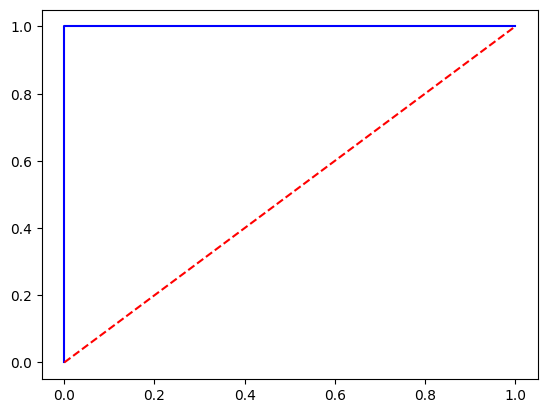

In [238]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [239]:
# Можно сделать вывод, что наш классификатор идеально прогнозирует тестируемые данные

In [247]:
pd.Series(best_clf.feature_importances_, index=list(X.columns)).sort_values(ascending=False)

Audit_Risk        0.362358
Inherent_Risk     0.305463
Score             0.070431
TOTAL             0.065906
Money_Value       0.036829
PARA_B            0.030457
PARA_A            0.029609
District_Loss     0.027201
RiSk_E            0.026824
Risk_A            0.022893
CONTROL_RISK      0.009487
Risk_D            0.007172
Risk_B            0.003850
Score_A           0.000873
Sector_score      0.000648
LOCATION_ID       0.000000
PROB              0.000000
Risk_C            0.000000
History           0.000000
Prob              0.000000
Risk_F            0.000000
Score_B.1         0.000000
numbers           0.000000
Score_B           0.000000
Detection_Risk    0.000000
Score_MV          0.000000
dtype: float64

In [249]:
# Самый влияющий фактор - Audit_Risk, однако зависимость все равно слабая